# Shading

In [1]:
from pyrt.math import Vec3
from pyrt.scene import Scene
from pyrt.light import PointLight, AmbientLight
from pyrt.geometry import Sphere, Parallelepiped, ClosedCylinder, PlanarTexture, Parallelogram, Triangle, Vertex, Cylinder, Parallelepiped
from pyrt.material import PhongMaterial
from pyrt.camera import PerspectiveCamera
from pyrt.renderer import SimpleRT
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

First we synthesize a scene with a single point light source.

In [2]:
scene = Scene()
engine = SimpleRT(shadow=True, iterations=1)

# Creating Renderer: Simple Raytracer
# Shadow Enabled


In [3]:
scale = 2
width = int(320 * scale)
height = int(240 * scale)

In [4]:
ball = PhongMaterial(color=Vec3(0,0,0.9), reflectivity=.5)
white = PhongMaterial(color=Vec3(1,1,1), reflectivity=.0)
mat0 = PhongMaterial(color=Vec3(0.5,0.5,0.8), reflectivity=.0)
mat1 = PhongMaterial(color=Vec3(1.0,1.0,0.0), reflectivity=0.0)
mat2 = PhongMaterial(color=Vec3(0.6,0.0,0.0), shininess=100.0, reflectivity=0.7)
mat3 = PhongMaterial(color=Vec3(0.0,0.7,0.7), shininess=100.0, reflectivity=0.7)
mat4 = PhongMaterial(color=Vec3(0.7,0.0,0.7))

In [5]:
camera = PerspectiveCamera(width, height, 60)
camera.setView(Vec3(0.1,-15.,5.), Vec3(0,0.,0.), Vec3(0.,0.,1.))
scene.setCamera(camera)

In [6]:
scene.addLight(PointLight(Vec3(-3,-15,10)))

In [7]:
x, y = np.meshgrid(range(8),range(8))
z = np.mod(x + y, 2)
z = np.kron(z,np.ones((128,128))) * 255
texture = np.stack([z, z, z], axis=2).astype(np.uint8)

In [8]:
scene.add(PlanarTexture(Vec3(-10,-11,0),Vec3(20,0,0),Vec3(0,20,0),texture, white))
scene.add(Parallelepiped(Vec3(6,2,0),Vec3(2,-2,0),Vec3(2,2,0.),Vec3(0,0,4), mat0))
scene.add(ClosedCylinder(Vec3(-1.,0.,0.0), Vec3(0.,0.,3.0), 1.5, mat1))
scene.add(ClosedCylinder(Vec3(-1.,0.,3.0), Vec3(0.,0.,1.0), 1.0, mat1))
scene.add(Sphere(Vec3(-3.,-8.,1.5), 1.5, mat2))
scene.add(Sphere(Vec3(0.,-5.,1.0), 1.0, mat3))
scene.add(Parallelepiped(Vec3(3,-9,0),Vec3(1.5,1.5,0),Vec3(-1.5,1.5,0),Vec3(0,0,2.1), mat4))
scene.add(Sphere(Vec3(5.0,6.5,1.), 1., ball))

In [9]:
image = engine.render(scene)

# RENDER STATISTICS###############################
TIME FOR RENDERING: 241.00185537338257s
NUMBER OF PRIMARY RAYS: 307200
NUMBER OF SECONDARY RAYS: 0
NUMBER OF SHADOW RAYS: 233424
RAYS/s: 2243.2358421573763
##################################################


(-0.5, 639.5, 479.5, -0.5)

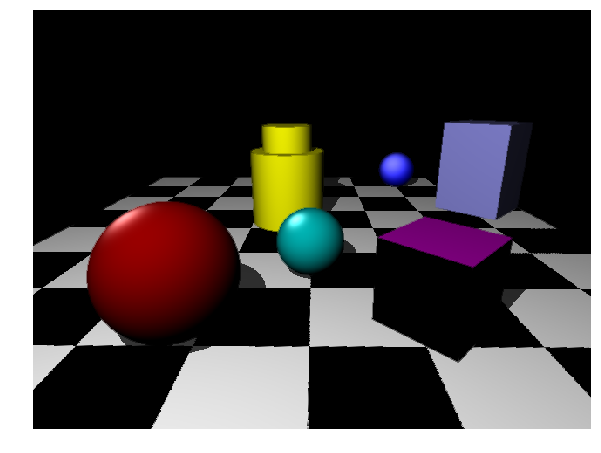

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(image.data)
plt.axis('off')

In [11]:
cv2.imwrite("toyworld1.png", cv2.cvtColor(image.data, cv2.COLOR_RGB2BGR))

True

Next, we add an ambient light source.

In [12]:
scene.addLight(AmbientLight(brightness=0.7))

In [13]:
image2 = engine.render(scene)

# RENDER STATISTICS###############################
TIME FOR RENDERING: 243.50378108024597s
NUMBER OF PRIMARY RAYS: 307200
NUMBER OF SECONDARY RAYS: 0
NUMBER OF SHADOW RAYS: 233424
RAYS/s: 2220.1872907338507
##################################################


(-0.5, 639.5, 479.5, -0.5)

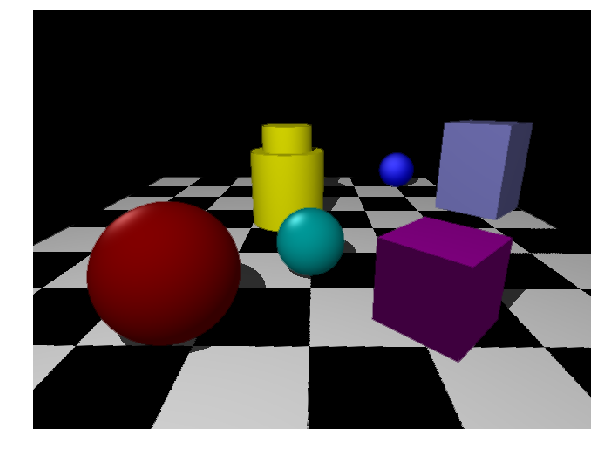

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(image2.data)
plt.axis('off')

In [15]:
cv2.imwrite("toyworld2.png", cv2.cvtColor(image2.data, cv2.COLOR_RGB2BGR))

True

Finally, we remove the light sources and add a new point source where darkening with distance is taken into account by specifying a parameter vector $dpar$ that decays lighting by $\frac{1}{dpar[0] + dpar[1] d + dpar[2] d^2}$.

In [16]:
scene.lights.clear()

In [17]:
scene.addLight(PointLight(Vec3(-3,-15,10),brightness=1.5, dpar=Vec3(1,0,0.01)))

In [18]:
image3 = engine.render(scene)

# RENDER STATISTICS###############################
TIME FOR RENDERING: 240.41553282737732s
NUMBER OF PRIMARY RAYS: 307200
NUMBER OF SECONDARY RAYS: 0
NUMBER OF SHADOW RAYS: 233424
RAYS/s: 2248.7066190859546
##################################################


(-0.5, 639.5, 479.5, -0.5)

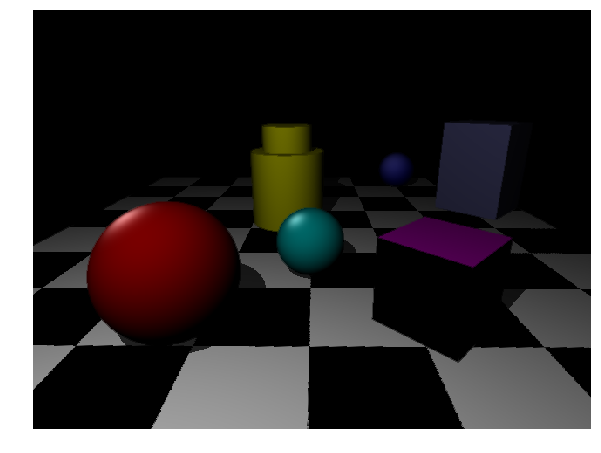

In [19]:
plt.figure(figsize=(10,10))
plt.imshow(image3.data)
plt.axis('off')

In [20]:
cv2.imwrite("toyworld3.png", cv2.cvtColor(image3.data, cv2.COLOR_RGB2BGR))

True